In [1]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
import os
from shutil import copy
import seaborn as sns

import datetime
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import imageio
from itertools import compress

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams.update({'figure.max_open_warning': 0})

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'legend.title_fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
#‘xx-small’, ‘x-small’, ‘small’, ‘medium’, ‘large’, ‘x-large’, ‘xx-large’
pylab.rcParams.update(params)
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from statsmodels.tsa.api import VAR

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree

import re

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df_date_temperature = pd.read_csv('../data/FW_temperature_filled.csv')
df_date_temperature['event_date'].max()

'2023-12-11'

<AxesSubplot:xlabel='event_date'>

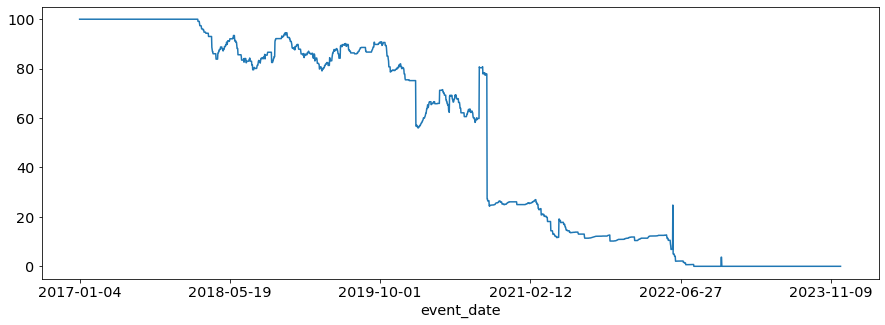

In [3]:
df_date_temperature.groupby('event_date')['temperature'].apply(lambda x: x.isna().mean() * 100).plot()

In [4]:
df_date_temperature['event_date'].max()

'2023-12-11'

In [7]:
# Drop NaN values
df_date_temperature = df_date_temperature.dropna()

# Get unique part numbers
unic_part_number_list = df_date_temperature['final_locus_population_id'].unique()

# Calculate rolling mean for the entire DataFrame
df_date_temperature['rolling_tempr'] = df_date_temperature.groupby('final_locus_population_id')['temperature'].rolling(30, min_periods=1).mean().reset_index(level=0, drop=True)

# Calculate the mean of the first 30 temperatures for each part number
average_tempr_30 = df_date_temperature.groupby('final_locus_population_id')['temperature'].apply(lambda x: x.head(30).mean())
half_average_tempr_30 = average_tempr_30 / 2

# Apply the np.where condition
for part_number in tqdm(unic_part_number_list):
    first_30_temps = df_date_temperature.loc[df_date_temperature['final_locus_population_id'] == part_number, 'temperature'].head(30)
    t_dif = first_30_temps - average_tempr_30[part_number]
    condition_indices = first_30_temps.index
    df_date_temperature.loc[condition_indices, 'rolling_tempr'] = np.where(abs(t_dif) < half_average_tempr_30[part_number], first_30_temps, average_tempr_30[part_number])

# Your final DataFrame
df_temperature_cleared = df_date_temperature




100%|██████████| 4190/4190 [00:13<00:00, 311.53it/s]


In [8]:
# Assuming df_temperature_cleared is a pandas DataFrame with 'temperature' and 'rolling_tempr' columns
half_t_rolling_aver = df_temperature_cleared['rolling_tempr'] / 2
t_dif_clear = df_temperature_cleared['temperature'] - df_temperature_cleared['rolling_tempr']

# Using numpy's where function for vectorized conditional assignment
df_temperature_cleared['temperature_cleared'] = np.where(abs(t_dif_clear) < half_t_rolling_aver, 
                                                         df_temperature_cleared['temperature'], 
                                                         df_temperature_cleared['rolling_tempr'])

In [17]:
# df_date_temperature = df_date_temperature.dropna()
# part_number_list = df_date_temperature['final_locus_population_id'].tolist()
# unic_part_number_list = []
# df_temperature_cleared = pd.DataFrame(columns = ['final_locus_population_id','event_date', 'temperature_cleared'])
# for item in part_number_list:
#    if item not in unic_part_number_list:
#        unic_part_number_list.append(item)
# n = 0
# while n < len(unic_part_number_list):
#    part_number = unic_part_number_list[n]
#    df_temperature_filtered = df_date_temperature[(df_date_temperature['final_locus_population_id'] == part_number)]
#    df_temperature_filtered.reset_index(drop = True, inplace = True)
#    #df_temperanure_filtered = df_temperature_filtered.reindex(columns = df_temperature_filtered.columns.tolist()+['rolling_tempr','tempr_cleared'])
#    df_temperature_filtered['rolling_tempr'] = df_temperature_filtered['temperature'].rolling(30).mean()
#    df_temporary = df_temperature_filtered.head(30)
#    average_tempr_30 = df_temporary['temperature'].mean()
#    half_average_tempr_30 = average_tempr_30 / 2 
#    k = 0
#    while k < len(df_temporary):
#        t_1 = df_temperature_filtered.at[k,'temperature']
#        t_dif = t_1 - average_tempr_30
#        if abs(t_dif) < half_average_tempr_30:
#                df_temperature_filtered.at[k,'rolling_tempr'] = t_1
#        else:
#                df_temperature_filtered.at[k,'rolling_tempr'] = average_tempr_30
#        k = k + 1        
#    df_temperature_cleared = pd.concat([df_temperature_cleared, df_temperature_filtered],axis=0) #df_temperature_cleared = df_temperature_cleared.append(df_temperature_filtered)    
#    n = n + 1
#    print ('n', n)
# datatypes_1 = df_temperature_cleared.dtypes
# m = 0
# cc = len(df_temperature_cleared)
# for m in range (cc):
#     t_2 = df_temperature_cleared.iloc[m]['temperature']
#     t_rolling_aver = df_temperature_cleared.iloc[m]['rolling_tempr']
#     half_t_rolling_aver = t_rolling_aver / 2
#     t_dif_clear = t_2 - t_rolling_aver
#     if abs(t_dif_clear) < half_t_rolling_aver:
#         df_temperature_cleared.at[m,'temperature_cleared'] = t_2
#     else:
#         df_temperature_cleared.at[m,'temperature_cleared'] = t_rolling_aver
#     m = m + 1
#     print ('m', m)    

n 1
n 2
n 3
n 4
n 5
n 6
n 7
n 8
n 9
n 10
n 11
n 12
n 13
n 14
n 15
n 16
n 17
n 18
n 19
n 20
n 21
n 22
n 23
n 24
n 25
n 26
n 27
n 28
n 29
n 30
n 31
n 32
n 33
n 34
n 35
n 36
n 37
n 38
n 39
n 40
n 41
n 42
n 43
n 44
n 45
n 46
n 47
n 48
n 49
n 50
n 51
n 52
n 53
n 54
n 55
n 56
n 57
n 58
n 59
n 60
n 61
n 62
n 63
n 64
n 65
n 66
n 67
n 68
n 69
n 70
n 71
n 72
n 73
n 74
n 75
n 76
n 77
n 78
n 79
n 80
n 81
n 82
n 83
n 84
n 85
n 86
n 87
n 88
n 89
n 90
n 91
n 92
n 93
n 94
n 95
n 96
n 97
n 98
n 99
n 100
n 101
n 102
n 103
n 104
n 105
n 106
n 107
n 108
n 109
n 110
n 111
n 112
n 113
n 114
n 115
n 116
n 117
n 118
n 119
n 120
n 121
n 122
n 123
n 124
n 125
n 126
n 127
n 128
n 129
n 130
n 131
n 132
n 133
n 134
n 135
n 136
n 137
n 138
n 139
n 140
n 141
n 142
n 143
n 144
n 145
n 146
n 147
n 148
n 149
n 150
n 151
n 152
n 153
n 154
n 155
n 156
n 157
n 158
n 159
n 160
n 161
n 162
n 163
n 164
n 165
n 166
n 167
n 168
n 169
n 170
n 171
n 172
n 173
n 174
n 175
n 176
n 177
n 178
n 179
n 180
n 181
n 182
n 183
n 184
n 18

KeyboardInterrupt: 

In [11]:
df_temperature_cleared

,final_locus_population_id,event_date,temperature,rolling_tempr,temperature_cleared
406,36783130,2018-02-14,13.7,13.700000,13.7
407,36783130,2018-02-15,13.9,13.900000,13.9
408,36783130,2018-02-16,13.2,13.200000,13.2
409,36783130,2018-02-17,13.9,13.900000,13.9
410,36783130,2018-02-18,13.3,13.300000,13.3
...,...,...,...,...,...
1954126,194761283,2023-12-07,13.8,13.011667,13.8
1954127,194761283,2023-12-08,13.1,13.028333,13.1
1954128,194761283,2023-12-09,13.5,13.058333,13.5
1954129,194761283,2023-12-10,13.8,13.108333,13.8


<AxesSubplot:xlabel='event_date'>

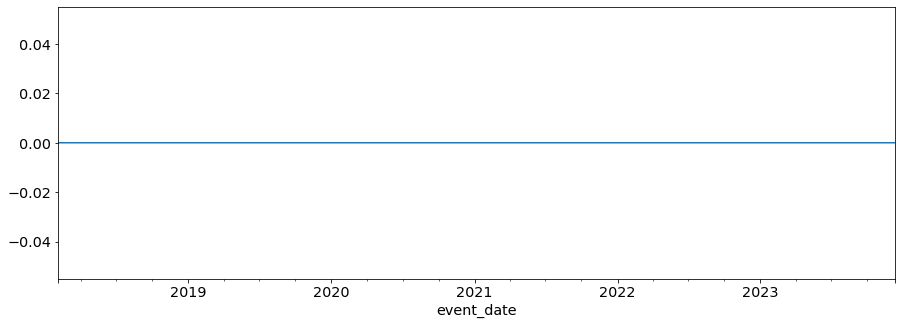

In [10]:
df_temperature_cleared['event_date'] = pd.to_datetime(df_temperature_cleared['event_date'])
df_temperature_cleared.groupby('event_date')['temperature'].apply(lambda x: x.isna().mean() * 100).plot()

In [12]:
df_temperature_cleared.to_csv('../data/FW_temperature_cleared.csv')